<a href="https://colab.research.google.com/github/metahwi/MachineLearning/blob/main/Decision%20Tree%20Classifiers%20and%20Ensemble%20Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree Classifiers and Ensemble Methods


This notebook aims to introduce decision tree classifiers and different types of ensembling methods and how they can be used in binary classification tasks.

## Decision Trees

[Decision Trees (DTs)](https://www.taylorfrancis.com/books/mono/10.1201/9781315139470/classification-regression-trees-leo-breiman) are a non-parametric supervised learning algorithm which can be used for classification or regression. The aim of a DT is to create a model that would help predict a target variable using simple decision rules, typically inferred from a set of examples.

Let's start practicing different aspects of DTs with the features from the sklearn library.

DecisionTreeClassifier(criterion='entropy')

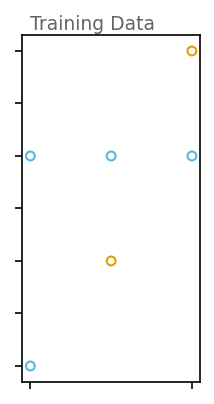

In [ ]:
# Lets first create a basic dataset for binary classification
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
BLUE, ORANGE, GRAY = '#57B5E8', '#E69E00', '#646369'

# Our training data X is composed of two features, and our predictions are 0 or 1
X = np.array([[0, 0], [1, 1], [2,2], [2,3], [0,2], [1,2]])
Y = np.array([0, 1, 0, 1, 0, 0 ])

def plot_data(X, Y):
    fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
    ax.set_aspect(1.3)
    ax.scatter(X[:, 0], X[:, 1], s=18, facecolors='none',
               edgecolors=np.array([BLUE, ORANGE])[Y])
    ax.tick_params(
        bottom=True, left=True, labelleft=False, labelbottom=False)
    ax.text(0, 3.2, 'Training Data', color=GRAY, fontsize=9)
    return fig, ax

_, _ = plot_data(X, Y)


Let's define and build a Decision Tree classifier on this data set.

In [ ]:
# Default splitting is done using Gini impurity, we will use entropy for our exercise.
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy')

Let's now create a test set with 2-dimensional features representing a set of random real-valued numbers to evaluate the classification performance of our Decision Tree classifier.

In [ ]:
test_X = 3 + 2.5 * np.random.randn(10, 2)
print(test_X)
clf.predict(test_X)

[[ 1.02772181  4.39758844]
 [ 2.7411854   1.29750674]
 [ 3.04989843  3.07124426]
 [ 8.60809771  7.55050547]
 [ 5.95005222 -1.29390414]
 [ 4.41823124  2.0621419 ]
 [ 4.78668297  0.26157806]
 [ 5.56234956  5.01502041]
 [ 6.68253719  1.14633995]
 [-0.45565512 -1.07331567]]


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [ ]:
# We can also see the probability with which the classifier assigns each class for every sample
clf.predict_proba(test_X)

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.]])

We can also inspect how the parameters of the tree look like.

In [ ]:
clf.get_n_leaves()

NameError: ignored

Please check the documentation of the [DT in Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and inspect the parameters that define and restrict the usage of DTs.

The decision tree seems to be pretty confident on all of its predictions. Any ideas how we can confuse it?

**HINT:** Here probability can be thought of as the number of samples in the leaf node with the same class

0


<Figure size 640x480 with 0 Axes>

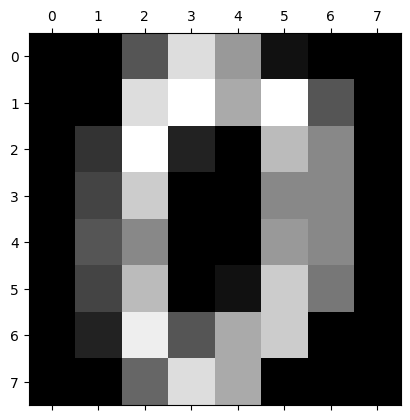

In [ ]:
# This was just a synthetic dataset, lets try the decision tree on a more meaningful one
from sklearn.datasets import load_digits
import graphviz

# We use the digits dataset provided by sklearn, this is similar to MNIST but much coarser (8x8) and
# thus a lot lighter than MNIST (28x28)
dataset = load_digits()
X, Y = dataset.data, dataset.target
idxs = np.arange(0, len(X))
np.random.shuffle(idxs)
train_idxs,test_idxs = idxs[:1500], idxs[1500:]
train_X, train_Y = X[train_idxs], Y[train_idxs]
test_X, test_Y = X[test_idxs], Y[test_idxs]
plt.gray()
plt.matshow(dataset.images[0])
print(dataset.target[0])

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_X, train_Y)
dot_data = tree.export_graphviz(clf, out_file='graph.dot',
                      feature_names=dataset.feature_names,
                      class_names=str(dataset.target_names),
                      filled=True, rounded=True,
                      special_characters=True)
graph = graphviz.Source(dot_data)
!dot -Tpng graph.dot -o graph.png

In [ ]:
# Predict using the fitted decision tree
preds = clf.predict(test_X)

In [ ]:
# Calculate classification accuracy
print(np.sum(preds == test_Y)/len(preds))

0.8720538720538721


## Bagging

A [Bagging Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) is the concept of using an ensemble of smaller classifiers, each of which are fit on random subsets of the original dataset and then aggregating their individual predictions (either by voting or by averaging) to form a final prediction.

In [ ]:
from sklearn.ensemble import BaggingClassifier

# Remember, Bagging is just using an ensemble of decision trees to add more variance to your model.
# So we simply wrap our original DecisionTreeClassifier with a BaggingClassifier module.
clf = BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(criterion='entropy'),
                       n_estimators=50, max_samples=1.0, max_features=1.0, bootstrap=True)
clf = clf.fit(train_X, train_Y)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
preds = clf.predict(test_X)

In [ ]:
print(np.sum(preds == test_Y)/len(preds))

0.9562289562289562




Lets repeat the experiment of Bagging using an SVM as a classifier. Y

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC

clf = BaggingClassifier(estimator=SVC(kernel='linear'), n_estimators=50, random_state=0, max_samples=1.0, max_features=1.0, bootstrap=True)
clf = clf.fit(train_X, train_Y)

preds = clf.predict(test_X)
print(np.sum(preds == test_Y)/len(preds))

0.9831649831649831


## Random Forests

Let's now implement the [Random Forests](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) algorithm which is another ensembling method for decision trees. In Random Forests ensembling, each sampled feature in the subset is evaluated in the classification task, and only the best split feature from the subset is used to split each node in the tree, unlike in bagging where all features are considered for splitting a node.

In [ ]:
# Random forests
from sklearn.ensemble import RandomForestClassifier

# Now we try RandomForests on the same data. Again, RandomForests is just a method to ensemble your base models
# and will be used in the same way bagging was.
clf = RandomForestClassifier(n_estimators=50)
clf.fit(train_X, train_Y)


RandomForestClassifier(n_estimators=50)

In [ ]:
preds = clf.predict(test_X)

In [ ]:
print(np.sum(preds == test_Y)/len(preds))

0.9663299663299664


## Adaptive boosting

Next we implement adaptive boosting, in particular the [Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) algorithm.
An important note here is that adaptive boosting algorithms involve iteratively improving the decision trees and hence involve a learning rate similar to logistic regressions, which may need tuning in order to get the best performance.

In [ ]:
# Next we implement gradient boosting, in particular the Adaboost algorithm.
# Remember, gradient boosting algorithms involve iteratively improving the decision trees
# and hence involve a learning rate similar to logistic regressions.
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_gaussian_quantiles

# Construct dataset
X1, y1 = make_gaussian_quantiles(
    cov=2.0, n_samples=200, n_features=2, n_classes=2, random_state=1
)
X2, y2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=1
)
X = np.concatenate((X1, X2))
y = np.concatenate((y1, -y2 + 1))


<ipython-input-82-bd9f61c5ffaa>:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


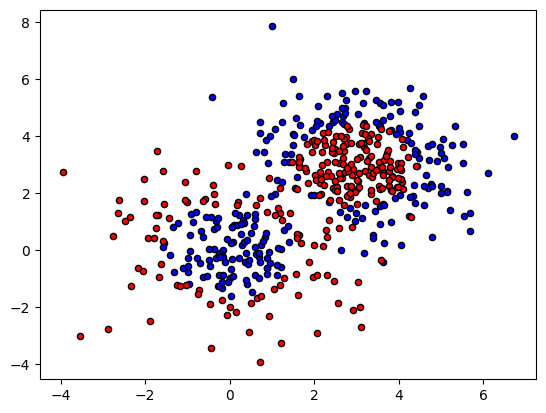

In [ ]:
# Plot the training points
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )

In [ ]:
# Create and fit an AdaBoosted decision tree
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200, learning_rate=0.01
)
bdt.fit(X, y)


AdaBoostClassifier(algorithm='SAMME',
                   estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=200)

<ipython-input-84-e600f1d25fa8>:17: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


Text(0.5, 1.0, 'Decision Boundary')

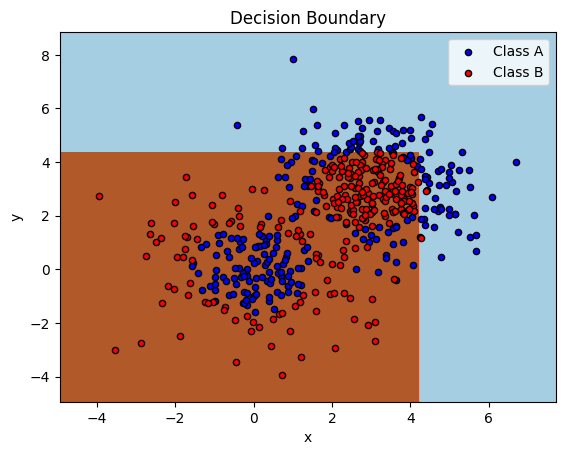

In [ ]:
# Plot the decision boundaries
plt.subplot(111)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
)

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
for i, n, c in zip(range(2), class_names, plot_colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0],
        X[idx, 1],
        c=c,
        cmap=plt.cm.Paired,
        s=20,
        edgecolor="k",
        label="Class %s" % n,
    )
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend(loc="upper right")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Decision Boundary")


Lets update the number of estimators in the AdaBoost classifier to 20 and 2000, and the learning rate to 0.001 and 0.1. Repeat the training and classification. Plot the decision boundary and measure accuracy. Compare the results of classifiers trained with different learning rates and estimators.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier

def plot(X, y):
  # Plot the decision boundaries
  plt.subplot(111)
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(
      np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
  )

  Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
  plt.axis("tight")

  # Plot the training points
  for i, n, c in zip(range(2), class_names, plot_colors):
      idx = np.where(y == i)
      plt.scatter(
          X[idx, 0],
          X[idx, 1],
          c=c,
          cmap=plt.cm.Paired,
          s=20,
          edgecolor="k",
          label="Class %s" % n,
      )
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.legend(loc="upper right")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Decision Boundary")


<ipython-input-88-76f9507b099b>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


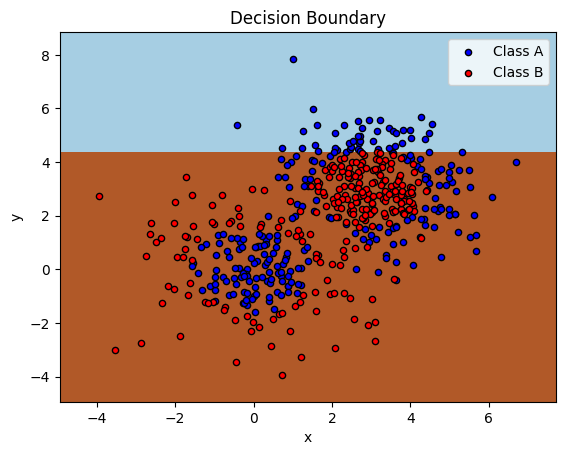

In [ ]:
# 1, AdaBoost with 20 estimators
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=20, learning_rate=0.01
)
bdt.fit(X, y)
plot(X, y)

<ipython-input-88-76f9507b099b>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


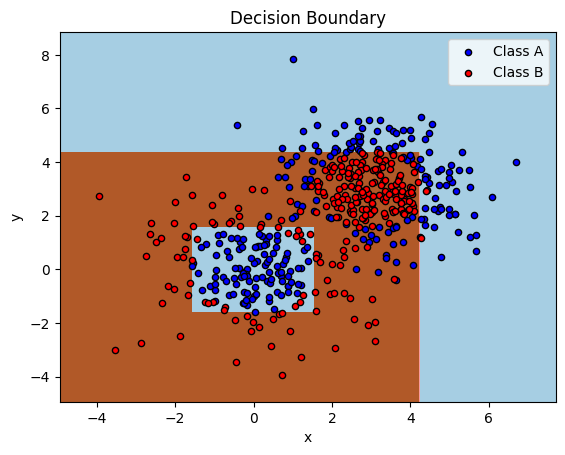

In [ ]:
# 2. AdaBoost with 2000 estimators
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=2000, learning_rate=0.01
)
bdt.fit(X, y)
plot(X, y)

<ipython-input-88-76f9507b099b>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


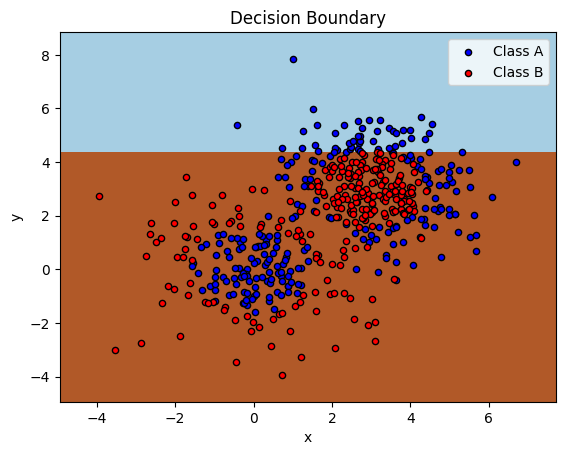

In [ ]:
# 3. AdaBoost with 200 estimators and learning rate of 0.001
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200, learning_rate=0.001
)
bdt.fit(X, y)
plot(X, y)

<ipython-input-88-76f9507b099b>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


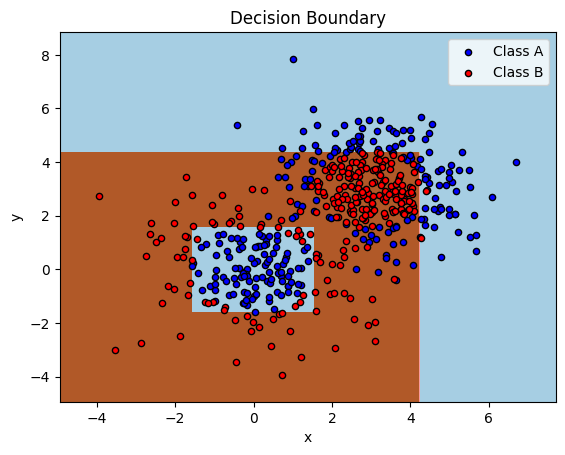

In [ ]:
# 3. AdaBoost with 200 estimators and learning rate of 0.1
bdt = AdaBoostClassifier(
    tree.DecisionTreeClassifier(max_depth=1), algorithm="SAMME", n_estimators=200, learning_rate=0.1
)
bdt.fit(X, y)
plot(X, y)

Lets repeat the classification experiment with [Gradient Boosting Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier), which trains learners based upon minimising the loss function of a learner.

<ipython-input-88-76f9507b099b>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


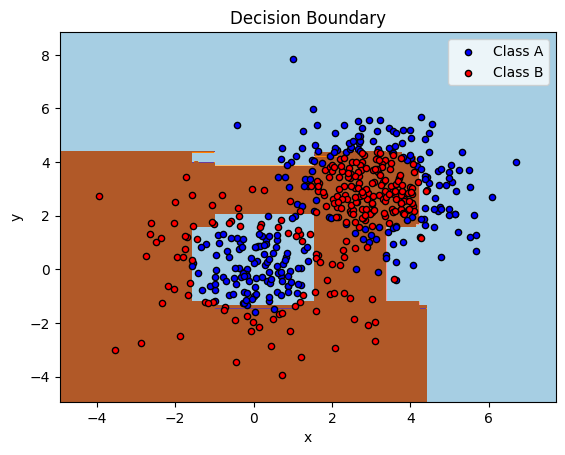

In [ ]:
# Create and fit a Gradient boosted decision tree
from sklearn.ensemble import GradientBoostingClassifier

bdt = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01)
bdt.fit(X, y)
plot(X, y)
